# Matplotlib Advanced
데이터사이언스 5장 _ 그림의구조 Figure

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  #매직명령어 노트북내부에그림표시


UsageError: unrecognized arguments: #매직명령어 노트북내부에그림표시


In [4]:
mpl.rc('font', family='Malgun Gothic') # 한글폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서  음수 부호설정


## 그림의 구조

### Figure객체

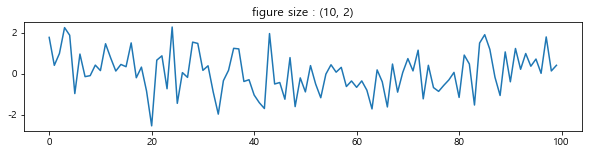

In [9]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))  #있어야 옆으로 펼쳐짐(없으면 쫍쫍쫍)사이즈10, 2
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.show()

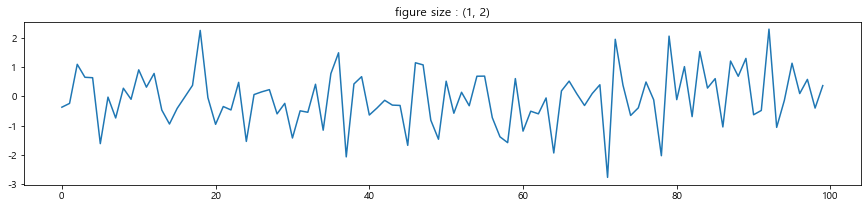

In [11]:
f2 = plt.figure(figsize=(15, 3))  #있어야 옆으로 펼쳐짐(사이즈를 15, 3으로 늘리니 더 커짐)같은비율
plt.title("figure size : (1, 2)")
plt.plot(np.random.randn(100))
plt.show()

In [13]:
print(f1, id(f1))
print(f2, id(f2))

Figure(432x288) 1931749509248
Figure(432x288) 1931749509248


Figure(432x288) 1931749509248
Figure(432x288) 1931749509248


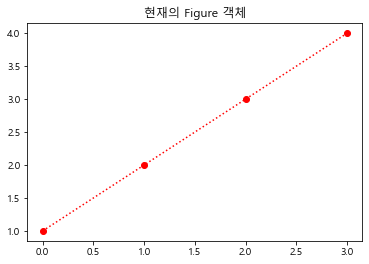

In [12]:
#그닥..중요치않다하심 ㅎㅎ
f1 = plt.figure(1)
plt.title("현재의 Figure 객체")
plt.plot([1, 2, 3, 4], 'ro:')

f2 = plt.gcf()
print(f1, id(f1))
print(f2, id(f2))
plt.show()

## Axes 객체와 subplot 명령 ******************************중요
plt.subplot(행, 열, 순서) 0부터시작안한다 (주의)  
1 2   
3 4  


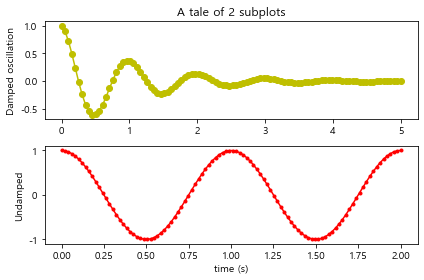

In [42]:
x1 = np.linspace(0.0, 5.0, 100) #0~5까지 디폴트
x2 = np.linspace(0.0, 2.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1) #axes객체를 행2 열1개 첫번째 객체네! 
plt.plot(x1, y1, 'yo-') #옐로우에 -선
plt.title('A tale of 2 subplots') #전체타이틀
plt.ylabel('Damped oscillation') 

ax2 = plt.subplot(2, 1, 2) #axes객체를 행2 열1개 두번째 객체네!
plt.plot(x2, y2, 'r.-') #레드에 .쩜
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()  #살짝 높이가 타이트해짐 ;ㅁ;ㅋㅋ 그래도 있어야 예쁨
plt.show()

In [44]:
# 위와같은결과에 for반복문 적용해보자 ...교수님도 어렵...... 나는엄청더어렵
# 왜인지 오류
x1 = np.linspace(0.0, 5.0, 100) #0~5까지 


fig, axes = plt.subplot(2, 1, sharex=True)  
for i in range(2):
    ax = axes[i]       #1차원으로 열이 1개뿐이라
    y = np.cos(2 * np.pi * x1) * np.exp(-x1) if i==0 else np.cos(2 * np.pi * x1)
    ylabel = 'Damped oscillation' if i==0 else 'Undamped'
    ax.plot(x, y)
    ax.axhline(0)
    ax.set_ylim(-1,1)         #set_붙음
    ax.set_ylabel(ylabel)     #set_붙음
    ax.set_xlabel('time (s)') #set_붙음

plt.show()

ValueError: Illegal argument(s) to subplot: (2, 1)

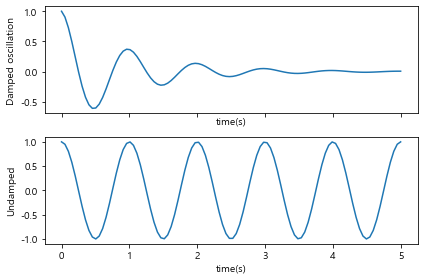

In [101]:
#승모코드 왜인지 진폭의 좌우가 바뀜 
fig, axes = plt.subplots(2, 1, sharex=True)
x = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

for i in range(2):
    ax = axes[i]
    y = np.cos(2 * np.pi * x) * np.exp(-x) if i ==0 else np.cos(2* np.pi * x)
    ylabel = 'Damped oscillation' if i == 0 else 'Undamped'
    ax.plot(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('time(s)')
plt.tight_layout()
plt.show()

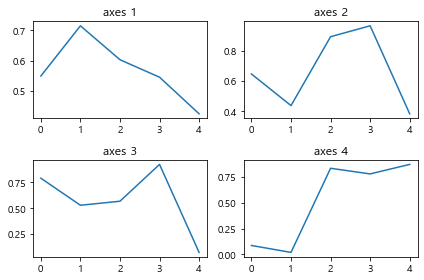

In [31]:
#같은결과1
np.random.seed(0)

plt.subplot(221)         #첫번째
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)         #두번째
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)         #세번째
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)         #네번째
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()
plt.show()

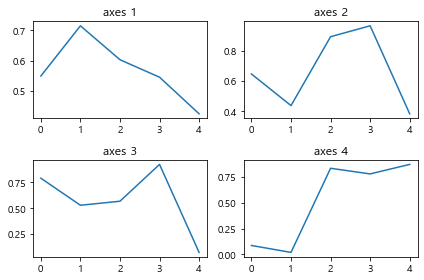

In [33]:
#같은결과2 위에것를 이렇게도 표현가능........subplots  중요
fig, axes = plt.subplots(2, 2)  #항상 이렇게 시작함 

np.random.seed(0)
axes[0, 0].plot(np.random.rand(5))  #plot을 이렇게 주고
axes[0, 0].set_title("axes 1")
axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")
axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")
axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")

plt.tight_layout()
plt.show()


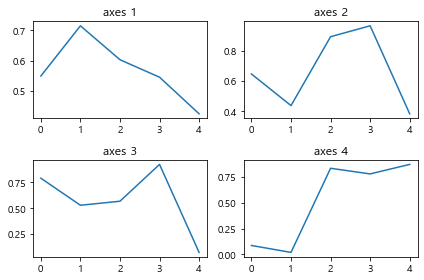

In [36]:
#같은결과3 위와 같은 결과/ for반복문사용***중요 세련 
fig, axes = plt.subplots(2, 2)  #항상 이렇게 시작함 

np.random.seed(0)
for i in range(2):
    for k in range(2):
        ax = axes[i][k]
        ax.plot(np.random.rand(5))
        ax.set_title(f"axes {2*i+k+1}")

plt.tight_layout()
plt.show()

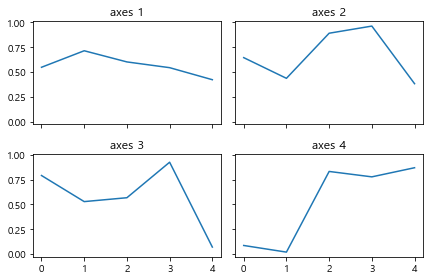

In [37]:
#같은결과4 위와 같은 결과/ for반복문사용***중요 세련  + 옵션있어용
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)  #여기옵션 xy 쉐어링했어용~ 가운데부분

np.random.seed(0)
for i in range(2):
    for k in range(2):
        ax = axes[i][k]
        ax.plot(np.random.rand(5))
        ax.set_title(f"axes {2*i+k+1}")

plt.tight_layout()
plt.show()

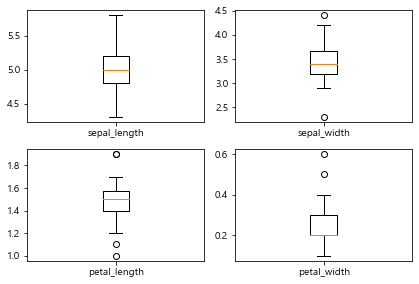

In [26]:
#이건 혼자 해봤당 ㅋㅋ 하나씩 나눠서 그리기 서브플롯이용 (쓸모없는거였음)
iris = sns.load_dataset('iris')
x =iris[iris.species == 'setosa'].sepal_length
y =iris[iris.species == 'setosa'].sepal_width
x1 =iris[iris.species == 'setosa'].petal_length
y1 =iris[iris.species == 'setosa'].petal_width
ax1 = plt.subplot(2, 2, 1)
plt.boxplot([x],labels=['sepal_length'])

ax1 = plt.subplot(2, 2, 2)
plt.boxplot([y],labels=['sepal_width'])

ax1 = plt.subplot(2, 2, 3)
plt.boxplot([x1],labels=['petal_length'])

ax1 = plt.subplot(2, 2, 4)
plt.boxplot([y1],labels=['petal_width'])

plt.tight_layout()
plt.show()

In [75]:
# 아이리스품종별로 옆으로 나열하기 ..  혼자 망...
iris = sns.load_dataset('iris')
fig, axes = plt.subplots(1, 3, sharey=True)

for i in range(1):  # i행
    for k in range(3): # k열
        ax = axes[i][k]
        ax.boxplot(iris.species)
        ax.set_title(iris.species)


plt.boxplot([x,y,x1,y1],labels=['sepal_length','sepal_width','petal_length','petal_width'])

ax2 = plt.subplot(1, 3, 2)
ax.set_title=' '
plt.boxplot([x,y,x1,y1],labels=['sepal_length','sepal_width','petal_length','petal_width'])

ax3 = plt.subplot(1, 3, 3)
ax.set_title='setosa' 'virginica'  'versicolor'  'species'
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [108]:
# 역시 교수님 풀이  ..그런데도 오류났네ㅔㅔㅔㅔㅔㅔ아놔 (내용안들어감)
iris = sns.load_dataset('iris')
fig, axes = plt.subplots(1, 3, figsize=(15,8), sharey=True)  #피큐어사이즈키움 와이축공유
for spec in enumerate(['setosa', 'versicolor', 'virginaca']): #in enumerate 인덱스값하나씩 튕겨져나옴
    sl =iris[iris.species == spec ].sepal_length
    sw =iris[iris.species == spec ].sepal_width
    pl =iris[iris.species == spec ].petal_length
    pw =iris[iris.species == spec ].petal_width
    ax = axes[i]  #하기 위해서 위에 in enumerate  한것이다.
    ax.boxplot((sl, sw, pl, pw),
        labels=['sepal_length','sepal_width','petal_length','petal_width'])
    ax.set_title(f"{spec}품종")

IndexError: index 3 is out of bounds for axis 0 with size 3

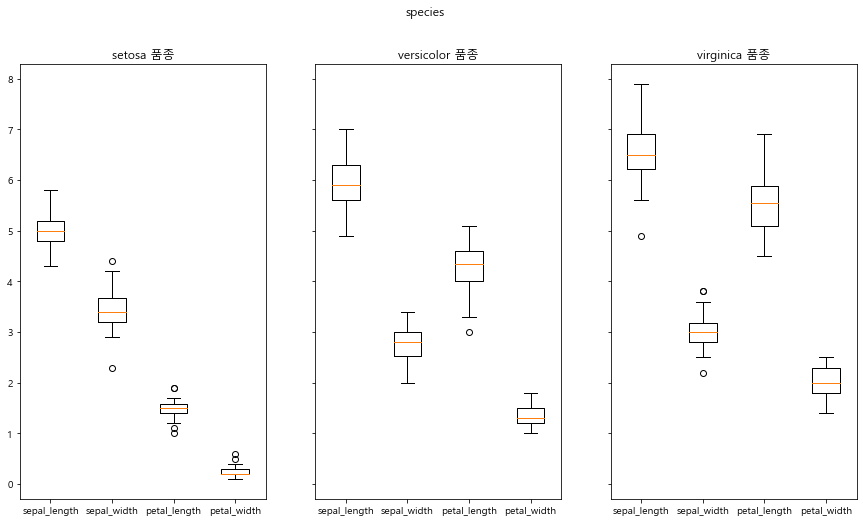

In [105]:
#승모코드
fig, axes = plt.subplots(1, 3,figsize = (15,8), sharey=True)
for i, spec in enumerate (['setosa', 'versicolor', 'virginica']):
    sl = iris[iris.species == spec].sepal_length
    sw = iris[iris.species == spec].sepal_width
    pl = iris[iris.species == spec].petal_length
    pw = iris[iris.species == spec].petal_width
    ax = axes[i]
    ax.boxplot((sl, sw, pl ,pw), labels=['sepal_length','sepal_width','petal_length','petal_width'])
    ax.set_title(f"{spec} 품종")
    fig.suptitle("species")
plt.show()

## 교수님ppt예제 Anscombe's Quartet

In [80]:
ans = sns.load_dataset('anscombe')
ans.shape  #어떻게 생겼냐 ~ 44에 3열

(44, 3)

In [81]:
ans.head()  #어떻게 생겼냐~   4가지니까 그룹바이로 묶어서 상세보기를 해보자(아래)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [82]:
ans.groupby('dataset').describe() #카운트11 평균9 분산3.31표준편차
#이걸 가지고 산점도, 회귀선을 그려보자

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [83]:
ds1 = anspansds1 = ans[ans['dataset'] == 'I']
ds2 = ans[ans['dataset'] == 'II']
ds3 = ans[ans['dataset'] == 'III']
ds4 = ans[ans['dataset'] == 'IV']   #;세미콜론으로 연결가능

In [96]:
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'magenta'
}

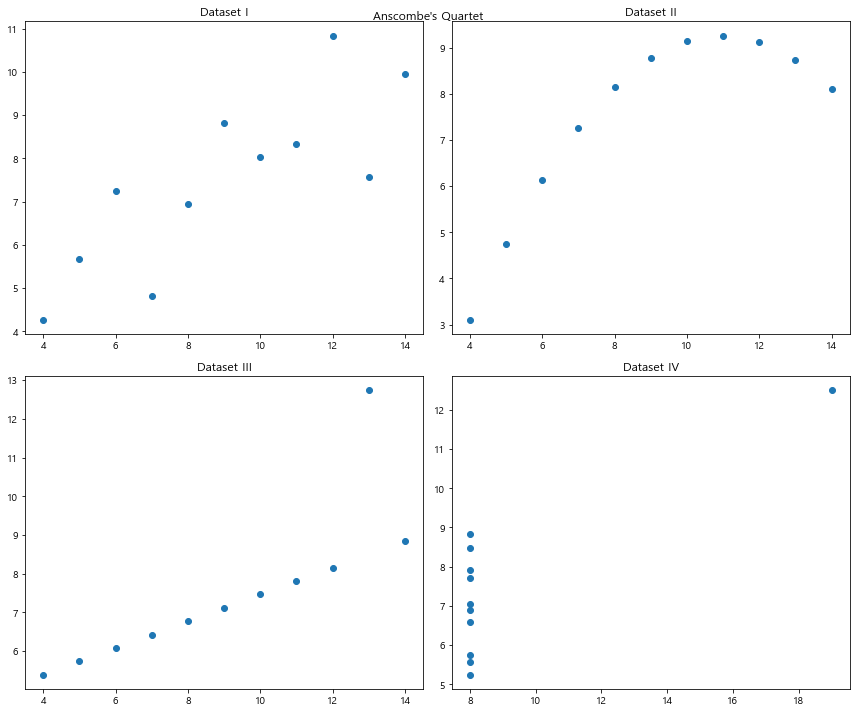

In [99]:
#이것은 노가다.. 해서는 안되는 일....  (아래처럼)
fig = plt.figure(figsize=(12,10))  #사이즈 키우고
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

ax1.plot(ds1['x'], ds1['y'], 'o')
ax2.plot(ds2['x'], ds2['y'], 'o')
ax3.plot(ds3['x'], ds3['y'], 'o')
ax4.plot(ds4['x'], ds4['y'], 'o')

ax1.set_title('Dataset I')
ax2.set_title('Dataset II')
ax3.set_title('Dataset III')
ax4.set_title('Dataset IV')

#title_font따로 설정
fig.suptitle("Anscombe's Quartet")
fig.tight_layout()
plt.show()

#한눈에 비교하기 불편..set_limit 으로 묶어주기

In [ ]:
# code Refactoring

#같은결과 for반목분을 사용해서 
fig, axes = plt.subplots(2, 2, figsize=(12,0), sharex=True, sharey=True) 
for i, num in enumerate(['I', 'II', 'III', 'IV']):  #이것에 대해서 돌린다
    ds = ans[ans['dataset'] == num
     #x는 ds가 될것이고 , y는 ds가 될것이다
     #ax =  i가 0일경우에는 0 0
                1           0 1
                2           1 0
                3           1 1  그래서 공식이 [i//2][i%2] 몫과 나머지를 계산하는 연산
    #ax.plot() #마커사이즈가 작아서 키웠어요 =10정도로
# 플롯을  마커o모양 안정해주면 낙서하듯 직선으로 나온다 
# 회귀식 y = 0.5x + 3
# 그래서  (3,20) (4,5,13)



# ax set_title(f')




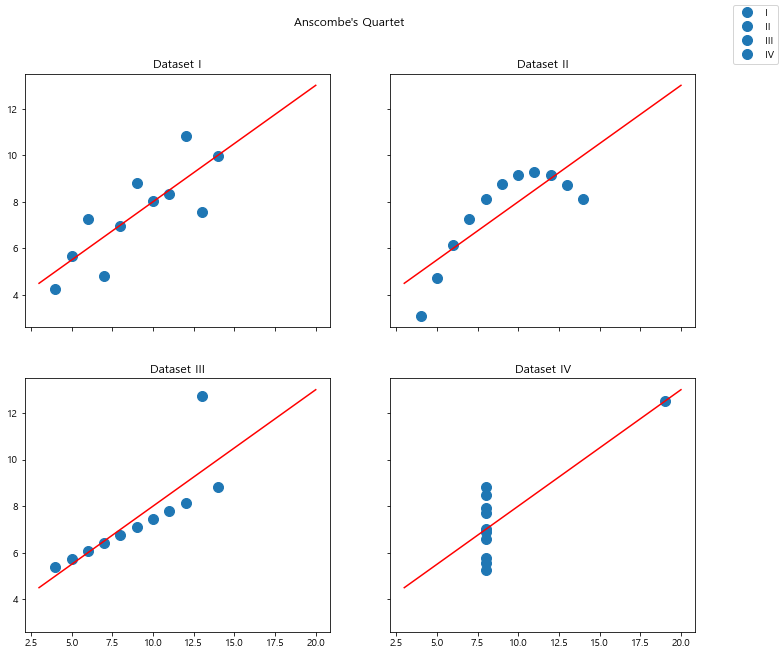

In [106]:
fig, axes = plt.subplots(2, 2, figsize = (12,10), sharey=True,sharex=True)
for i, num in enumerate (['I', 'II', 'III', 'IV']):
    ds = ans[ans['dataset'] == num]
    ax = axes[i//2][i%2]
    ax.plot(ds.x,ds.y,  'o' , markersize = 10,  label=num)
    ax.plot([3,20],[4.5,13], 'r-')
    ax.set_title(f"Dataset {num}")
fig.legend(loc ="upper right")
fig.suptitle("Anscombe's Quartet", fontsize= "12")
fig.subplots_adjust(top=0.9)
# 서브 슬롯간 간격
plt.show()

## Axis 객체와 축 (데이터사이언스 05.시각화)

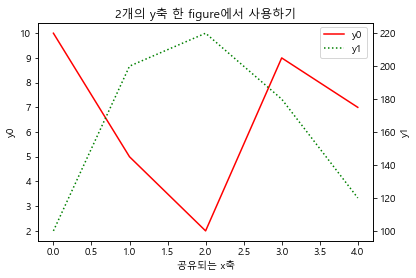

In [107]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)
ax0.set_xlabel("공유되는 x축")
#fig.legend()  #plt.legend는 1개만 나오더라.. 왜... 
fig.legend(loc ="upper right", bbox_to_anchor=(0.86, 0.89))  #여기만 추가 해서범례가 안으로 들어감
plt.show()

#그래프 2개를 그렸는데  x축만 공유/ 양쪽스케일이 달라서 좌, 우 y축 다르게했음
#레전드 안에 넣기 loc=